## Loading Dataset:

In [1]:
#### importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import gender_guesser.detector as gender # for categorical variable FIRST_NAME
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression, Lasso # regression models (scikit-learn)

# setting pandas print options to expand output display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None) # to read entire data dictionary


# specifying file name for dataset
file = '/Users/Alejandra/Desktop/MSBA/Machine Learning/datasets/Apprentice_Chef_Dataset.xlsx'
# specifying file name for variable dictionary
file_dict = '/Users/Alejandra/Desktop/MSBA/Machine Learning/datasets/Apprentice_Chef_Data_Dictionary.xlsx'


# reading the files into Python
app_chef = pd.read_excel(io = file)
app_chef_dict = pd.read_excel(io = file_dict)


# renaming mislabelled variable (discovered during initial dataset exploration)
app_chef.rename(columns = {"LARGEST_ORDER_SIZE" : "AVG_ORDER_SIZE"},
                inplace = True)

# log transforming REVENUE and saving it to the dataset
app_chef['LOG_REVENUE'] = np.log10(app_chef['REVENUE'])

## Feature Engineering:

#### Subsetting 'FIRST_NAME' into Gender with get_gender():

In [2]:
# guessing gender based on (given) name
d = gender.Detector()

app_chef['GENDER'] = app_chef['FIRST_NAME'].map(lambda x: d.get_gender(x))


# checking results
app_chef['GENDER'].value_counts()


# mapping gender to dataframe
app_chef['GENDER'] = app_chef['GENDER'].map({
                      'mostly_female': 'FEMALE', 
                      'mostly_male': 'MALE', 
                      'andy': 'MALE',
                      'female' : 'FEMALE',
                      'male' : 'MALE',
                      'unknown': 'unknown'
})


# making list with unknow gender values
app_chef_unknown = list(app_chef['FIRST_NAME'][app_chef['GENDER'] == 'unknown'])


# creating male and female names lists
male_list = ['Addam','Aegon','Aegor','Aelinor','Aemon','Aggar','Aggo','Alannys',
             'Albett','Alebelly','Arson','Artos','Arwyn','Baelor','Barbrey',
             'Barre','Barristan','Barth','Beck','Beldecar','Bellegere','Beron',
             'Black','Bloodbeard','Bodger','Bonifer','Boros','Bradamar','Brogg',
             'Bronn','Byan','Calon','Canker','Carellen','Cetheres','Chett',
             'Chiswyck','Cleos','Coldhands','Colemon','Corlys','Cortnay',
             'Crawn','Cuger','Dacks','Daemon','Daeron','Dafyn','Dagon','Dake',
             'Danwell','Dickon','Donel','Donnel','Donnor','Dontos','Dornish',
             'Draqaz','Drennan','Duram','Eddard','Edderion','Edmyn','Edric',
             'Edwyn','Eggon','Endrew','Fornio','Fralegg','Frenken','Garizon',
             'Garlan','Garse','Gendel','Gorold','Gran','Grazdan','Grazdar',
             'Greydon','Gulian','Guthor','Gwayne','Gyles','Halmon','Harle',
             'Harren','Harrold','Harwyn','Hoarfrost','Hoke','Hot','Hother',
             'Humfrey','Hunnimore','Irri','Jack-Be-Lucky','Jaremy','Jeor',
             'Jhaqo','Jhiqui','Aerion','Andros','Androw','Arys','Bael','Balman',
             'Balon','Bannen','Belwas','Benjen','Beric','Boremund','Borroq',
             'Bran','Branston','Brown','Brynden','Byam','Byren','Cleyton','Cohollo',
             'Collio','Colmar','Cossomo','Craghas','Cragorn','Cregan','Cutjack',
             'Dagmer','Jonos','Deziel','Doran','Dunaver','Dunsen','Durran','Easy',
             'Edmure','Edwyd','Elys','Eon','Erryk','Esgred','Falyse','Farlen',
             'Ferrego','Flement','Garigus','Godwyn','Gormond','Gurn','Guyard',
             'Gwin','Gylbert','Gynir','Hake','Halder','Haldon','Horas','Halys',
             'Harlon','Harmond','Harmune','Harrag','Harwin','Harwood','Harys',
             'Hayhead','Hazrak','Helliweg','High','Hizdahr','Hobb','Hoster',
             'Howland','Hullen','Hyle','Ilyn','Jaehaerys','Jate','Aemond',
             'Alekyne','All-for-Joffrey','Allaquo','Ambrode','Andar','Antario',
             'Arrec','Arwood','Axell','Azor','Azzak','Baelon','Barthogan','Bayard',
             'Bearded','Benedar','Bennis','Beqqo','Betharios','Bharbo','Big',
             'Blind','Blue','Bluetooth','Briar','Brusco','Bryen','Butterbumps',
             'Cellador','Clubfoot','Clydas','Colen','Coratt','Cotter','Daegon',
             'Dagos','Dancy','Danos','Delonne','Delp','Domeric','Dykk','Ebrose',
             'Eddison','Edrick','Eldiss','Emphyria','Erreck','Erreg','Fogo',
             'Galazza','Galladon','Galyeon','Gawen','Gelmarr','Gendry','Gerardys',
             'Gerren','Gerris','Gevin','Gillam','Gilwood','Gladden','Godric',
             'Godry','Gormon','Gowen','Great','Green','Greenbeard','Grey','Grubbs',
             'Gunthor','Guyne','Gwynesse','Gyleno','Gyloro','Daario','Hallis',
             'Hareth','Harmund','Heward','Horton','Husband','Imry','Jafer',
             'Jeffory','Walys','Jhogo','Jorelle','Joseth','Jyck','Kaeth',
             'Kennos','Kirth','Kojja','Kurz','Lamprey','Lancel','Larence','Leathers',
             'Lem','Lenn','Lewys','Lister','Lomys','Lorent','Lotho','Lucimore',
             'Lucion','Lucos','Lymond','Mace','Mallor','Malwyn','Manfrey','Manfryd',
             'Mathos','Mawney','Medgar','Melwys','Mollos','Moreo','Moryn','Mudge',
             'Murch','Naerys','Narbert','Norjen','Normund','Tybolt','Rodrik',
             'Ollidor','Olyvar','Jonothor','Joth','Karyl','Kedge','Koss','Kraznys',
             'Kromm','Kurleket','Kyleg','Lark','Lenwood','Lenyl','Leobald','Leonette',
             'Loras','Lorcas','Gallard','Lord','Lorren','Luwin','Lythene',
             'Marwyn','Matrice','Mazdhan','Mebble','Meldred','Melly','Merrell',
             'Mezzara','Monterys','Moonshadow','Mord','Morgarth','Morros','Munciter',
             'Mychel','Mallador','Walder','Old','Ollo','Olymer','Jorah','Joyeuse',
             'Ardrian','Kemmett','Kezmya','Khorane','Khrazz','Larys','Lennocks',
             'Lomas','Lothor','Lucamore','Lucifer','Luco','Luthor','Lync','Lysono',
             'Maelor','Mance','Marillion','Marq','Medger','Melicent','Aglantine',
             'Melwyn','Merlon','Merrett','Mikken','Miklaz','Moredo','Moribald',
             'Mullin','Murenmure','Muttering','Mycah','Narbo','Notch','Nymeria',
             'Nymos','Ondrew','Orell','Ormund','Orphan','Orwyle','Orys','Otter',
             'Ottomore','Ottyn','Pate','Patrek','Paxter','Pearse','Plummer',
             'Podrick','Pyat','Pylos','Qarl','Quenton','Quort','Ermesande',
             'Randyll','Rawney','Reznak','Rhaegar','Rhaegel','Rhaego','Rhaella',
             'Roelle','Rolder','Rolfe','Ronnel','Roose','Rugen','Ryam','Rycherd',
             'Ryman','Salladhor','Sallor','Salloreon','Samwell','Sargon','Senelle',
             'Shagga','Shyra','Sour','Squint','Stevron','Stonehand','Sylas',
             'Symond','Syrio','Tarber','Theon','Thormor','Timeon','Timett',
             'Todric','Tommard','TomToo','Torbert','Torrhen','Tregar','Tristifer',
             'Tumberjon','Tya','Tybero','Tyene','Tyland','Tyrek','Tyrion','Tywin',
             'Ulwyck','Vaemond','Valarr','Viserys','Vortimer','Waldon','Wallen',
             'Warryn','Willam','Willum','Wyl','Yellow','Ygon','Oro','Orton',
             'Osbert','Osfryd','Pono','Porridge','Porther','Portifer','Prendahl',
             'Qarlton','Qarro','Quellon','Quhuru','Quickfinger','Rafe','Edgerran',
             'Raymar','Raymun','Redwyn','Regenard','Reysen','Rickon',
             'Robar','Robett','Rolly','Roone','Rylene','Saathos','Sedgekins',
             'Sigrin','Skinner','Styr','Tallad','Tansy','Tanton','Three','Timoth',
             'Tion','Tobbot','Tommen','Tremond','Trystane','Ulrick','Umfred',
             'Urrathon','Urswyck','Urzen','Utherydes','Uthor','Vardis','Vargo',
             'Varly','Vickon','Wayn','Weese','Werlag','Willamen','Willas','Wolmer',
             'Woth','Wynafryd','Xhondo','Orbelo','Osney','Oswell','Oswyn',
             'Othell','Oznak','Parmen','Perriane','Petyr','Praed','Quill','Ragnor',
             'Helman','Maegor','Rat','Reynard','Rhaelle','Romny','Roryn','Runcel',
             'Ryles','Ryon','Sandor','Sarra','Sebaston','Sigfry','Skahaz','Skyte',
             'Spare','Spotted','Stalwart','Steely','Stonesnake','Sybassion',
             'Sybell','Ternesio','Theodan','Theomar','Thoren','Toregg','Trebor',
             'Tumco','Tysane','Tyta','Tytos','Uller','Urreg','Varamyr','Vayon',
             'Shortear','Waltyr','Wat','Whalen','Willifer','Toefinger','Wun',
             'Wylis','Wynafrei','Wynton','Yohn','Yormwell','Zei','Zekko','Zharaq',
             'Zhoe','Abelar','Aethelmure','Alequo','Laenor','Denyo','Alfyn','Anguy',
             'Arneld','Arnell','Arryk','Arthor','Ayrmidon','Ballabar','Bandy',
             'Beardless','Bedwyck','Benfred','Bennard','Bennarion','Biter','Bors',
             'Bump','Buu','Cadwyn','Castos','Cedrik','Cerrick','Cheyk','Chiggen',
             'Clarent','Craster','Cressen','Criston','Dalbridge','Dareon','Squinty',
             'Dhazzar','Dormund','Drogo','Dryn','Dywen','Edwyle','Elder','Elron',
             'Emmon','Emmond','Emrick','Eroeh','Eyron','Ezzelyno','Jothos','Urron',
             'Alyx','Ferret','Galtry','Gascoyne','Ghael','Grenn','Gretchel',
             'Groleo','Gueren','Guncer','Gyldayn','Haggon','Hairy','Harghaz',
              'Harra','Harras','Harrion','Harsley','Hazzea','Helicent','Henly',
             'Hodor','Hop-Robin','Hosman','Hosteen','Hotho','Hubard','Hugor',
             'Illyrio','Ironbelly','Jacks','Jaggot','Jammos','Janos','Jeren',
             'Jodge','Jojen','Jyzene','Kedry','Kenned','Larraq','Left','Lewyn',
             'Lharys','Lucan','Lum','Mad','Maege','Malliard','Mandon','Matarys',
             'Matthar','Matthos','Meizo','Merrit','Monster','Moro','Morrec',
             'Murmison','Nage','Nettles','Nissa','Norne','Norren','Nute','Ocley',
             'Ogo','Orbert','Orivel','Ossifer','Ossy','Othor','Palla','Perwyn',
             'Poetess','Pollitor','Polliver','Poxy','Puckens','Pudding',
             'Puddingfoot','Pycelle','Pyg','Pypar','Qotho','Quaro','Qyburn',
             'Racallio','Ragwyle','Rakharo','Redtusk','Reek','Renfred','Renly',
             'Rhogoro','Ricasso','Rodwell','Roggo','Rollam','Ronel','Ronnet',
             'Rorge','Roro','Rossart','Rudge','Runciter','Ryger','Rymolf',"Sailor's",
             'Sawwood','Scarb','Selmond','Shae','Sherrit','Sigfryd','Skittrick',
             'Squirrel','Stannis','Yoren','Xaro','Endehar','Mushroom','Frenya',
             'Albar','Satin','Errok','Enger','Galbart','Likely','Todder','Haggo',
             'Goady','Grigg','Joramun','Wendello','Forley','Medwick','Steelskin',
             'Stiv','Stygg','Tanselle','Terro','Theomore','Thistle','Hobber',
             'Illifer','Mollander','Lollys','Shagwell','Gared','Karlon','Daven',
             'Rigney','Togg','Tomard','Tormund','Torrek','Torren','Torwynd',
             'Ryk','Malleon','Jorgen','Zollo','Ghost','Frynne','Gorne','Tristimun',
             'Tuffleberry','Turnip','Patchface','Goodwin','Osmynd','Umma','Gerion',
             'Mago','Mero','Watt','Tymor','Chayle','Davos','Bhakaz','Carrot',
             'Tysha','Ulmer','Unella','Urek','Vyman','Tothmure','Turquin','Rast',
             'Jalabhar','Benfrey','Urrigon','Qos','Tygett','Ordello','Qhorin',
             'Mully','Tagganaro','Varys','Mohor','Veiled','Victarion','Vylarr',
             'Wex','Luton','Cadwyl','Utt','Cley','Maric','Perros','Walgrave',
             'Moqorro','Borcas','Jonnel','Harodon','Mirri','Jommy','Kegs','Grisel',
             'Jommo','Monford','Wate','Watty','Luceon','Osha','Sloey','Meribald',
             'Argrave','Lucias','Rafford','Weasel','Tobho','Dyah','Dunstan',
             'Wulfe','Cosgrove','Three-Tooth','Conwy','Hibald','Grunt','Areo',
             'Rhae','Willit','Yandry','Mors','Yorkel']
 
female_list = ['Aemma','Alester','Alicent','Alysanne','Annara','Bass','Berena',
               'Bessa','Brenett','Caleotte','Cyrenna', 'Daella','Daughter','Delena',
               'Doreah','Ebben','Eustace','Falia','Janei','Jaqen','Jeyne','Aladale',
               'Ashara','Belandra','Cassella','Catelyn','Cerenna','Chella',
               'Daena','Daenerys','Yorko','Dorea','Eddara','Elaena','Eleyna',
               'Ellaria','Elyn','Erena','Gariss','Grance','Grisella','Gysella',
               'Helya','Aenys','Aethan','Alliser','Allyria','Baela','Cynthea',
               'Dacey','Donyse','Falena','Jacelyn','Jaehaera','Jyana','Ketter',
               'Lann','Lanna','Lyessa','Maerie','Marghaz','Maslyn','Melara',
               'Mellara','Missandei','Obella','Oberyn','Olene','Jynessa','Laena',
               'Lyanna','Mag','Margaery','Megga','Melesa','Merling','Moelle',
               'Mother','Mysaria','Noho','Nymella','Olenna','Jyanna','Kella',
               'Layna','Loreza','Lucantine','Lynesse','Marsella','Meha','Melessa',
               'Meliana','Bellonara','Meryn','Minisa','Nightingale','Quentyn',
               'Sansa','Sawane','Selyse','Steffon','Sybelle','Valaena','Quenten',
               'Ravella','Sarella','Sarya','Scolera','Sefton','Serala','Serwyn',
               'Steffarion','Talla','Tyana','Qalen','Perra','Qyle','Rennifer',
               'Rhialta','Rosey',"S'vrone",'Saera','Sallei','Shiera','Shierle',
               'Small','Smiling','Sumner','Sylwa','Tanda','Tarle','Wylla',
               'Vaellyn','Visenya','Waymar','Wendamyr','Softfoot','Ygritte','Yna',
               'Zarabelo','Alerie','Agrivane','Carolei','Morra','Alvyn','Alysane',
               'Amarei','Amerei','Arya','Belis','Brea','Brella','Cassana','Cayn',
               'Cedra','Cersei','Chataya','Daeryssa','Darlessa','Daryn','Denestan',
               'Dobber','Donnis','Elyana','Emberlei','Erren','Mellos','Hallyne',
               'Helaena','Jorquen','Joseran','Josmyn','Jurne','Lady','Leslyn',
               'Maegelle','Mela','Melaquin','Meralyn','Merianne','Mordane','Morya',
               'Mylenda','Myrcella','Nolla','Nysterica','Obara','Quaithe','Quent',
               'Rainbow','Rhaena','Rohanne','Ryella','Sharna','Shirei','Myria',
               'Taena','Mellei','Melisandre','Alayaya','Bellena','Victaria',
               'Quence','Larra','Ezzara','Aerys','Rhaenys','Ysilla']
# print(len(male_list))
# print(len(female_list))


# hot coding male and female names into df
placeholder_lst = []

for name in app_chef_unknown:
        if name in male_list:
            placeholder_lst.append('MALE')
        elif name in female_list:
            placeholder_lst.append('FEMALE')
        else:
             print('error')
                
# creating dataframe with first name and gender            
app_chef_unknown = pd.DataFrame({
    'FIRST_NAME': app_chef_unknown,
    'GENDER': placeholder_lst
})


#mapping app_chef_unknown back to dataframe app_chef
m = app_chef.loc[:, 'GENDER'].eq('unknown')
app_chef.loc[:, 'GENDER'] = app_chef.loc[:, 'FIRST_NAME'].map(app_chef_unknown.drop_duplicates()\
                .set_index('FIRST_NAME')['GENDER']).where(m, app_chef['GENDER'])

# one hot encoding
ONE_HOT_GENDER = pd.get_dummies(app_chef.loc[:, 'GENDER'])
app_chef = app_chef.drop('GENDER', axis = 1)
app_chef = app_chef.join(ONE_HOT_GENDER)

#### Checking for correlation in family referrals:

In [3]:
#Creating new feature, Number of names
for index, value in app_chef.iterrows():
    app_chef.loc[index, 'NUMBER_OF_NAMES'] = len(app_chef.loc[index, 'NAME'].split(sep = ' '))

#### Checking for single unique meals purchases:

In [4]:
#Creating new feature SINGLE MEAL to isolate people making a single purchase
app_chef['SINGLE_MEAL'] = 0
app_chef.loc[app_chef['UNIQUE_MEALS_PURCH'] == 1, 'SINGLE_MEAL'] = 1

#### Splitting 'EMAIL' and coding it as a new variable 'EMAIL_DOMAIN':

In [5]:
# creating new column with differen email domains
placeholder_lst = []
    
# iterating through emails and splitting at '@'
for index, col in app_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = app_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']

# concatenating EMAIL_DOMAIN with app_chef DataFrame
app_chef = pd.concat([ app_chef, email_df['EMAIL_DOMAIN'] ],
                   axis = 1)

#printing value counts for EMAIL_DOMAIN
display(app_chef.loc[:, 'EMAIL_DOMAIN'].value_counts())

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
cocacola.com         28
merck.com            28
apple.com            27
nike.com             27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
verizon.com          22
mmm.com              22
caterpillar.com      22
pg.com               22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

#### Subsetting  'EMAIL_DOMAIN': Creating Dummy for 'PROFESSIONAL_EMAIL', 'PERSONAL_EMAIL' and 'JUNK_EMAIL':

In [6]:
# specifying professional emails and saving them to list
professional_emails = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                       'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com',
                       'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 
                       'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com',
                       'jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com',               
                       'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com',
                       'travelers.com', 'unitedtech.com', 'unitedhealth.com',
                       'verizon.com', 'visa.com', 'walmart.com']

personal_emails    = ['gmail.com', 'yahoo.com', 'protonmail.com']

junk_emails        = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                      'msn.com', 'passport.com']


# creating empty dummy variable for professional, personal and junk emails
app_chef.loc[:, 'd_PROFESSIONAL_EMAIL'] = 0
app_chef.loc[:, 'd_PERSONAL_EMAIL'] = 0
app_chef.loc[:, 'd_JUNK_EMAIL'] = 0

# looping over all emails and creating dummy for professional emails
for index, value in app_chef.iterrows():
    
    # filling in dummy variable for professional emails
    if app_chef.loc[index, 'EMAIL_DOMAIN'] in professional_emails:
        app_chef.loc[index, 'd_PROFESSIONAL_EMAIL'] =1
    
    # filling in dummy variable for personal emails
    elif app_chef.loc[index, 'EMAIL_DOMAIN'] in personal_emails:
        app_chef.loc[index, 'd_PERSONAL_EMAIL'] =1
    
    # filling in dummy variable for junk emails
    elif app_chef.loc[index, 'EMAIL_DOMAIN'] in junk_emails:
        app_chef.loc[index, 'd_JUNK_EMAIL'] =1
    
    # controlling for errors
    else:
        print("Something went wrong. Go back and check.")

#### Dropping Irrelevant Variables:

In [7]:
# dropping irrelevant features
app_chef = app_chef.drop(labels = ['NAME', 'FAMILY_NAME', 'FIRST_NAME', 'EMAIL',\
                                  'EMAIL_DOMAIN'],
                         axis   = 1)


# checking results
app_chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'LOG_REVENUE', 'FEMALE', 'MALE', 'NUMBER_OF_NAMES', 'SINGLE_MEAL', 'd_PROFESSIONAL_EMAIL', 'd_PERSONAL_EMAIL', 'd_JUNK_EMAIL'], dtype='object')

#### Combining independent variables into new ones:

In [8]:
# creating a new variable combining CANCELLATIONS_BEFORE_NOON +
# CANCELLATIONS_AFTER_NOON
app_chef['TOTAL_CANCELLATIONS'] = app_chef['CANCELLATIONS_BEFORE_NOON'] + \
                                  app_chef['CANCELLATIONS_AFTER_NOON']


#################################################


# creating a new variable combining CANCELLATIONS_BEFORE_NOON +
# CANCELLATIONS_AFTER_NOON
app_chef['HAS_LOCKER'] = app_chef['PACKAGE_LOCKER'] + \
                                  app_chef['REFRIGERATED_LOCKER']

#### Visualizing Data:

/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/A

/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/A

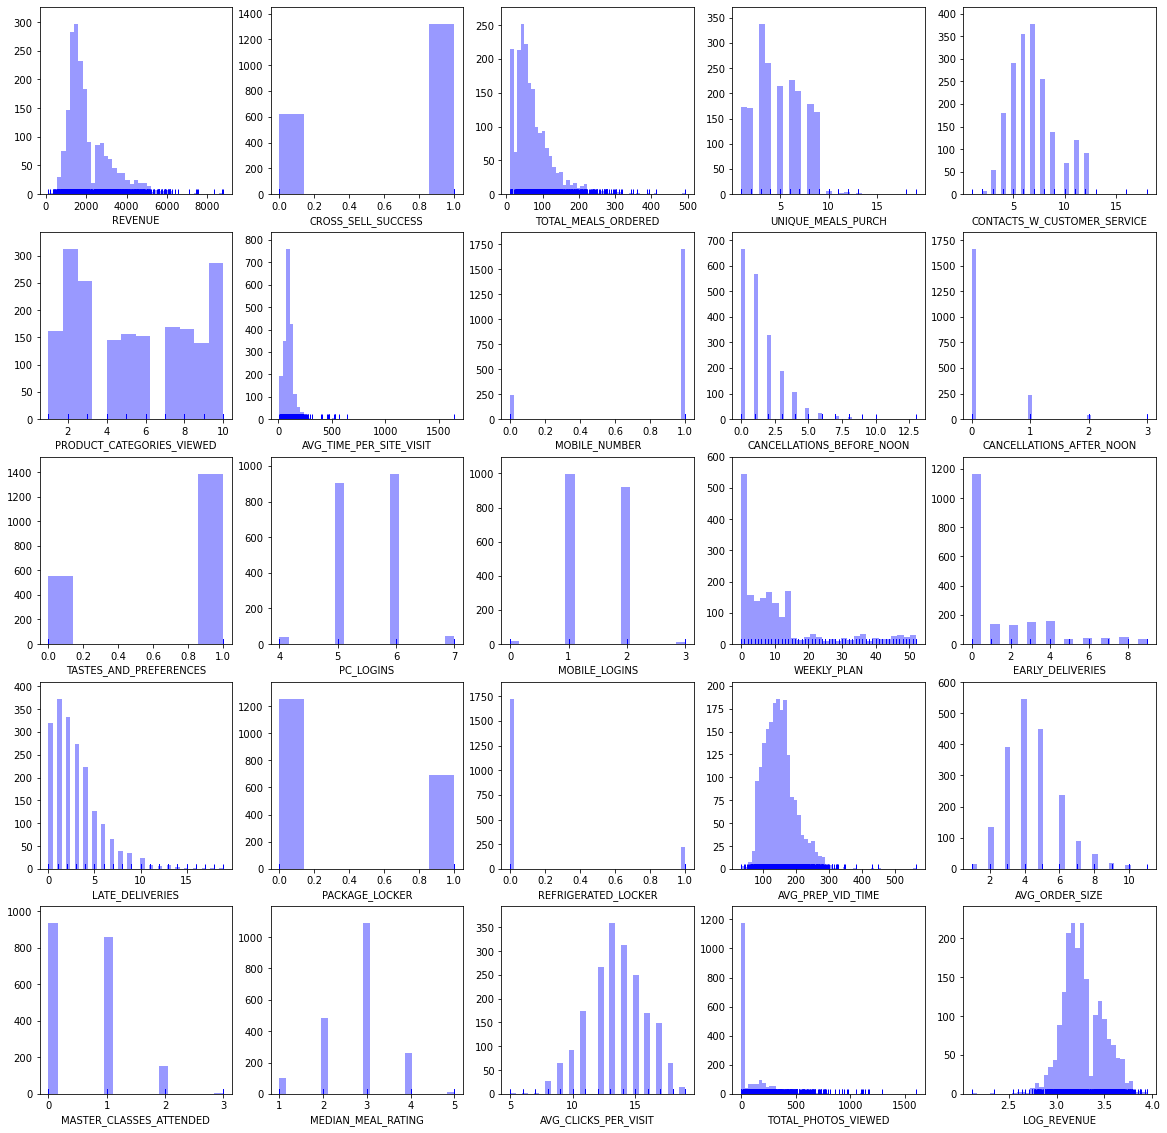

In [9]:
# create a loop to pull histograms to visulaize each numeriable variable 
f, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, app_chef.columns):
    sns.distplot(app_chef[feature], color="blue", kde=False, rug=True, ax=ax)

#### Creating Dummy Variables:

In [10]:
# creating empty lists
app_chef.loc[:, 'd_UNIQUE_MEALS_PURCH']          = 0
app_chef.loc[:, 'd_CONTACTS_W_CUSTOMER_SERVICE'] = 0
app_chef.loc[:, 'd_CANCELLATIONS_BEFORE_NOON']   = 0
app_chef.loc[:, 'd_AVG_ORDER_SIZE']              = 0
app_chef.loc[:, 'd_MASTER_CLASSES_ATTENDED']     = 0
app_chef.loc[:, 'd_MEDIAN_MEAL_RATING']          = 0
app_chef.loc[:, 'd_AVG_CLICKS_PER_VISIT']        = 0
app_chef.loc[:, 'd_TOTAL_PHOTOS_VIEWED']         = 0
app_chef.loc[:, 'd_LATE_DELIVERIES']             = 0
app_chef.loc[:, 'd_EARLY_DELIVERIES']            = 0
app_chef.loc[:, 'd_AVG_PREP_VID_TIME']           = 0
app_chef.loc[:, 'd_AVG_TIME_PER_SITE_VISIT']     = 0
app_chef.loc[:, 'type_EARLY_DELIVERIES']         = 0
app_chef.loc[:, 'type_LATE_DELIVERIES']          = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'UNIQUE_MEALS_PURCH'
    if app_chef.loc[index, 'UNIQUE_MEALS_PURCH'] < 9:
        app_chef.loc[index, 'd_UNIQUE_MEALS_PURCH'] =1
        
    # filling in 'CONTACTS_W_CUSTOMER_SERVICE'
    if app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        app_chef.loc[index, 'd_CONTACTS_W_CUSTOMER_SERVICE'] =1 
    
    # filling in 'CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 6:
        app_chef.loc[index, 'd_CANCELLATIONS_BEFORE_NOON'] =1 
    
    # filling in 'AVG_ORDER_SIZE'
    if app_chef.loc[index, 'AVG_ORDER_SIZE'] > 9:
        app_chef.loc[index, 'd_AVG_ORDER_SIZE'] =1

    # filling in 'MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        app_chef.loc[index, 'd_MASTER_CLASSES_ATTENDED'] =1
    
    # filling in 'MEDIAN_MEAL_RATING'
    if app_chef.loc[index, 'MEDIAN_MEAL_RATING'] > 3:
        app_chef.loc[index, 'd_MEDIAN_MEAL_RATING'] =1
    
    # filling in 'AVG_CLICKS_PER_VISIT'
    if app_chef.loc[index, 'AVG_CLICKS_PER_VISIT'] > 11:
        app_chef.loc[index, 'd_AVG_CLICKS_PER_VISIT'] =1
    
    # filling in 'TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        app_chef.loc[index, 'd_TOTAL_PHOTOS_VIEWED'] =1
    
    # filling in 'LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] > 8:
        app_chef.loc[index, 'd_LATE_DELIVERIES'] =1
    
    # filling in 'EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] > 4:
        app_chef.loc[index, 'd_EARLY_DELIVERIES'] = 1
    
    # filling in 'AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > 200:
        app_chef.loc[index, 'd_AVG_PREP_VID_TIME'] =1
    
    # filling in 'AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > 200:
        app_chef.loc[index, 'd_AVG_TIME_PER_SITE_VISIT'] =1
    
    # filling in 'type_EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] >= 1:
        app_chef.loc[index, 'type_EARLY_DELIVERIES'] = 1
    
    # filling in 'type_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] >= 1:
        app_chef.loc[index, 'type_LATE_DELIVERIES'] = 1
   

#### Creating Variables for Outliers and Trends:

In [11]:
# setting outlier and trend boundaries
# NOTE outL= outliers to the left ("Low"), outH = outliers to the right ("High")
out_AVG_PREP_VID_TIME            = 400
out_AVG_TIME_PER_SITE_VISIT      = 750
out_TOTAL_MEALS_ORDERED          = 250
out_UNIQUE_MEALS_PURCH           = 10
outL_CONTACTS_W_CUSTOMER_SERVICE = 3  
outH_CONTACTS_W_CUSTOMER_SERVICE = 12
out_CANCELLATIONS_BEFORE_NOON    = 9
out_CANCELLATIONS_AFTER_NOON     = 1.5
outH_MOBILE_LOGINS               = 2.5
outL_MOBILE_LOGINS               = 0.5
outH_PC_LOGINS                   = 6.5
outL_PC_LOGINS                   = 4.5
out_LATE_DELIVERIES              = 12
out_AVG_ORDER_SIZE               = 9
out_MASTER_CLASSES_ATTENDED      = 1
outL_AVG_CLICKS_PER_VISIT        = 7
out_TOTAL_PHOTOS_VIEWED         = 470
trend_AVG_PREP_VID_TIME         = 275
trend_AVG_TIME_PER_SITE_VISIT   = 200


# creating empty lists for outlier and trend variables
app_chef['out_AVG_PREP_VID_TIME']           = 0
app_chef['out_AVG_TIME_PER_SITE_VISIT']     = 0
app_chef['out_TOTAL_MEALS_ORDERED']         = 0
app_chef['out_UNIQUE_MEALS_PURCH']          = 0
app_chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
app_chef['out_CANCELLATIONS_BEFORE_NOON']   = 0
app_chef['out_CANCELLATIONS_AFTER_NOON']    = 0
app_chef['out_MOBILE_LOGINS']               = 0
app_chef['out_PC_LOGINS']                   = 0
app_chef['out_LATE_DELIVERIES']             = 0
app_chef['out_AVG_ORDER_SIZE']              = 0
app_chef['out_MASTER_CLASSES_ATTENDED']     = 0
app_chef['out_AVG_CLICKS_PER_VISIT']        = 0
app_chef['out_TOTAL_PHOTOS_VIEWED']         = 0
app_chef['trend_AVG_PREP_VID_TIME']         = 0
app_chef['trend_AVG_TIME_PER_SITE_VISIT']   = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'out_AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME:
        app_chef.loc[index, 'out_AVG_PREP_VID_TIME'] =1
    
    # filling in 'out_AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT:
        app_chef.loc[index, 'out_AVG_TIME_PER_SITE_VISIT'] =1
        
    # filling in 'out_TOTAL_MEALS_ORDERED'
    if app_chef.loc[index, 'TOTAL_MEALS_ORDERED'] > out_TOTAL_MEALS_ORDERED:
        app_chef.loc[index, 'out_TOTAL_MEALS_ORDERED'] =1
    
    # filling in 'out_UNIQUE_MEALS_PURCH'
    if app_chef.loc[index, 'UNIQUE_MEALS_PURCH'] > out_UNIQUE_MEALS_PURCH:
        app_chef.loc[index, 'out_UNIQUE_MEALS_PURCH'] =1
    
    # filling in 'out_CONTACTS_W_CUSTOMER_SERVICE'
    if app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < outL_CONTACTS_W_CUSTOMER_SERVICE:
        app_chef.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] =1
    elif app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > outH_CONTACTS_W_CUSTOMER_SERVICE:
        app_chef.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] =1
    
    # filling in 'out_CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > out_CANCELLATIONS_BEFORE_NOON:
        app_chef.loc[index, 'out_CANCELLATIONS_BEFORE_NOON'] =1
    
    # filling in 'out_CANCELLATIONS_AFTER_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > out_CANCELLATIONS_AFTER_NOON:
        app_chef.loc[index, 'out_CANCELLATIONS_AFTER_NOON'] =1
    
    # filling in 'out_MOBILE_LOGINS'
    if app_chef.loc[index, 'MOBILE_LOGINS'] < outL_MOBILE_LOGINS:
        app_chef.loc[index, 'out_MOBILE_LOGINS'] =1
    elif app_chef.loc[index, 'MOBILE_LOGINS'] > outH_MOBILE_LOGINS:
        app_chef.loc[index, 'out_MOBILE_LOGINS'] =1
    
    # filling in 'out_PC_LOGINS'
    if app_chef.loc[index, 'PC_LOGINS'] < outL_PC_LOGINS:
        app_chef.loc[index, 'out_PC_LOGINS'] =1
    elif app_chef.loc[index, 'PC_LOGINS'] > outH_PC_LOGINS:
        app_chef.loc[index, 'out_PC_LOGINS'] =1
    
    # filling in 'out_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] > out_LATE_DELIVERIES:
        app_chef.loc[index, 'out_LATE_DELIVERIES'] =1
        
    # filling in 'out_AVG_ORDER_SIZE'
    if app_chef.loc[index, 'AVG_ORDER_SIZE'] > out_AVG_ORDER_SIZE:
        app_chef.loc[index, 'out_AVG_ORDER_SIZE'] =1   
    
    # filling in 'out_MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > out_MASTER_CLASSES_ATTENDED:
        app_chef.loc[index, 'out_MASTER_CLASSES_ATTENDED'] =1   
    
    # filling in 'out_AVG_CLICKS_PER_VISIT'
    if app_chef.loc[index, 'AVG_CLICKS_PER_VISIT'] < outL_AVG_CLICKS_PER_VISIT:
        app_chef.loc[index, 'out_AVG_CLICKS_PER_VISIT'] =1 
        
    # filling in 'out_TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED:
        app_chef.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] =1 
    
    # filling in 'trend_AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > trend_AVG_PREP_VID_TIME:
        app_chef.loc[index, 'trend_AVG_PREP_VID_TIME'] =1
    
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > trend_AVG_TIME_PER_SITE_VISIT:
        app_chef.loc[index, 'trend_AVG_TIME_PER_SITE_VISIT'] =1


#### Creating variables for x-inflated features:

In [12]:
# identifying inflations in x-values
inf_TOTAL_MEALS_ORDERED        = 11  
inf_WEEKLY_PLAN                = 0   
inf_TOTAL_PHOTOS_VIEWED        = 0   
inf_CANCELLATIONS_BEFORE_NOON  = 0   
inf_CANCELLATIONS_AFTER_NOON   = 0   
inf_EARLY_DELIVERIES           = 0  
inf_LATE_DELIVERIES            = 0  
inf_MASTER_CLASSES_ATTENDED    = 0   


# creating empty lists for outlier and trend variables
app_chef['inf_TOTAL_MEALS_ORDERED']       = 0
app_chef['inf_WEEKLY_PLAN']               = 0
app_chef['inf_TOTAL_PHOTOS_VIEWED']       = 0
app_chef['inf_CANCELLATIONS_BEFORE_NOON'] = 0
app_chef['inf_CANCELLATIONS_AFTER_NOON']  = 0
app_chef['inf_EARLY_DELIVERIES']          = 0
app_chef['inf_LATE_DELIVERIES']           = 0
app_chef['inf_MASTER_CLASSES_ATTENDED']   = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'inf_TOTAL_MEALS_ORDERED'
    if app_chef.loc[index, 'TOTAL_MEALS_ORDERED'] == inf_TOTAL_MEALS_ORDERED:
        app_chef.loc[index, 'inf_TOTAL_MEALS_ORDERED'] =1
    
    # filling in 'inf_WEEKLY_PLAN'
    if app_chef.loc[index, 'WEEKLY_PLAN'] == inf_WEEKLY_PLAN:
        app_chef.loc[index, 'inf_WEEKLY_PLAN'] =1
    
    # filling in 'inf_TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] == inf_TOTAL_PHOTOS_VIEWED:
        app_chef.loc[index, 'inf_TOTAL_PHOTOS_VIEWED'] =1
        
    # filling in 'inf_CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] == inf_CANCELLATIONS_BEFORE_NOON:
        app_chef.loc[index, 'inf_CANCELLATIONS_BEFORE_NOON'] =1
    
    # filling in 'inf_CANCELLATIONS_AFTER_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] == inf_CANCELLATIONS_AFTER_NOON:
        app_chef.loc[index, 'inf_CANCELLATIONS_AFTER_NOON'] =1
    
    # filling in 'inf_EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] == inf_EARLY_DELIVERIES:
        app_chef.loc[index, 'inf_EARLY_DELIVERIES'] =1
    
    # filling in 'inf_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] == inf_LATE_DELIVERIES:
        app_chef.loc[index, 'inf_LATE_DELIVERIES'] =1
    
    # filling in 'inf_MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] == inf_MASTER_CLASSES_ATTENDED:
        app_chef.loc[index, 'inf_MASTER_CLASSES_ATTENDED'] =1
    

#### Checking that all the columns have been created:

In [13]:
# turning floats into ints
app_chef['REVENUE']                 = app_chef['REVENUE'].astype(int)
app_chef['AVG_TIME_PER_SITE_VISIT'] = app_chef['AVG_TIME_PER_SITE_VISIT'].astype(int)
app_chef['AVG_PREP_VID_TIME']      = app_chef['AVG_PREP_VID_TIME'].astype(int)

# displaying first rows of dataset
display(app_chef.head(n = 5))

# checking results
app_chef.info()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,LOG_REVENUE,FEMALE,MALE,NUMBER_OF_NAMES,SINGLE_MEAL,d_PROFESSIONAL_EMAIL,d_PERSONAL_EMAIL,d_JUNK_EMAIL,TOTAL_CANCELLATIONS,HAS_LOCKER,d_UNIQUE_MEALS_PURCH,d_CONTACTS_W_CUSTOMER_SERVICE,d_CANCELLATIONS_BEFORE_NOON,d_AVG_ORDER_SIZE,d_MASTER_CLASSES_ATTENDED,d_MEDIAN_MEAL_RATING,d_AVG_CLICKS_PER_VISIT,d_TOTAL_PHOTOS_VIEWED,d_LATE_DELIVERIES,d_EARLY_DELIVERIES,d_AVG_PREP_VID_TIME,d_AVG_TIME_PER_SITE_VISIT,type_EARLY_DELIVERIES,type_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_AVG_TIME_PER_SITE_VISIT,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_MOBILE_LOGINS,out_PC_LOGINS,out_LATE_DELIVERIES,out_AVG_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,trend_AVG_PREP_VID_TIME,trend_AVG_TIME_PER_SITE_VISIT,inf_TOTAL_MEALS_ORDERED,inf_WEEKLY_PLAN,inf_TOTAL_PHOTOS_VIEWED,inf_CANCELLATIONS_BEFORE_NOON,inf_CANCELLATIONS_AFTER_NOON,inf_EARLY_DELIVERIES,inf_LATE_DELIVERIES,inf_MASTER_CLASSES_ATTENDED
0,393,1,14,6,12,10,48,1,3,1,1,5,2,0,0,2,0,0,33,1,0,1,17,0,2.594393,0,1,1.0,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
1,1365,1,87,3,8,8,40,1,0,0,1,5,1,12,0,2,0,0,84,1,0,3,13,170,3.135133,1,0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
2,800,1,15,7,11,5,19,1,3,0,1,6,1,1,0,1,0,0,63,1,0,2,16,0,2.903090,0,1,2.0,0,1,0,0,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,600,1,13,6,11,5,90,1,2,0,1,6,1,14,0,3,0,0,43,1,0,2,14,0,2.778151,1,0,2.0,0,1,0,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
4,1490,1,47,8,6,10,40,1,0,0,0,5,1,5,0,8,0,0,84,1,1,3,12,205,3.173186,1,0,2.0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REVENUE                          1946 non-null   int64  
 1   CROSS_SELL_SUCCESS               1946 non-null   int64  
 2   TOTAL_MEALS_ORDERED              1946 non-null   int64  
 3   UNIQUE_MEALS_PURCH               1946 non-null   int64  
 4   CONTACTS_W_CUSTOMER_SERVICE      1946 non-null   int64  
 5   PRODUCT_CATEGORIES_VIEWED        1946 non-null   int64  
 6   AVG_TIME_PER_SITE_VISIT          1946 non-null   int64  
 7   MOBILE_NUMBER                    1946 non-null   int64  
 8   CANCELLATIONS_BEFORE_NOON        1946 non-null   int64  
 9   CANCELLATIONS_AFTER_NOON         1946 non-null   int64  
 10  TASTES_AND_PREFERENCES           1946 non-null   int64  
 11  PC_LOGINS                        1946 non-null   int64  
 12  MOBILE_LOGINS       

#### Saving the new cleaned dataset into excel and reloading it as app_chef:

In [14]:
# saving results
app_chef.to_excel('./datasets/Apprentice_Chef_Dataset_clean.xlsx',
                 index = False)

# loading saved file and reinstantiating app_chef
app_chef = pd.read_excel('./datasets/Apprentice_Chef_Dataset_clean.xlsx')

## Model Preparation:

In [15]:
# preparing explanatory variable data -> drop everything on the y side/other non-explanatory vars
app_chef_data   = app_chef.drop(['REVENUE',
                               'LOG_REVENUE'], 
                               axis = 1)


# preparing response variables (setting up y data: target)
app_chef_target = app_chef.loc[ : , 'REVENUE']
app_chef_log_target = app_chef.loc[ : , 'LOG_REVENUE']


# preparing training and testing sets (all letters are lowercase)
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_log_target, # tried OLS with app_chef_target too but worse
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 70)
y-side: (1459,)


Testing Data
------------
X-side: (487, 70)
y-side: (487,)



## Model Development and Variable Selection:

In [16]:
# iterating over dataset to print out all independent variable names
for val in app_chef_data:
    print(f" {val} + ")

 CROSS_SELL_SUCCESS + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 AVG_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 FEMALE + 
 MALE + 
 NUMBER_OF_NAMES + 
 SINGLE_MEAL + 
 d_PROFESSIONAL_EMAIL + 
 d_PERSONAL_EMAIL + 
 d_JUNK_EMAIL + 
 TOTAL_CANCELLATIONS + 
 HAS_LOCKER + 
 d_UNIQUE_MEALS_PURCH + 
 d_CONTACTS_W_CUSTOMER_SERVICE + 
 d_CANCELLATIONS_BEFORE_NOON + 
 d_AVG_ORDER_SIZE + 
 d_MASTER_CLASSES_ATTENDED + 
 d_MEDIAN_MEAL_RATING + 
 d_AVG_CLICKS_PER_VISIT + 
 d_TOTAL_PHOTOS_VIEWED + 
 d_LATE_DELIVERIES + 
 d_EARLY_DELIVERIES + 
 d_AVG_PREP_VID_TIME + 
 d_AVG_TIME_PER_

In [17]:
# merging X_train and y_train so that they can be used in statsmodels
app_chef_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """LOG_REVENUE ~ CROSS_SELL_SUCCESS + 
                                             TOTAL_MEALS_ORDERED + 
                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                             AVG_TIME_PER_SITE_VISIT + 
                                             REFRIGERATED_LOCKER + 
                                             AVG_PREP_VID_TIME + 
                                             AVG_ORDER_SIZE + 
                                             MASTER_CLASSES_ATTENDED + 
                                             MEDIAN_MEAL_RATING + 
                                             FEMALE + 
                                             MALE + 
                                             NUMBER_OF_NAMES + 
                                             SINGLE_MEAL + 
                                             d_PROFESSIONAL_EMAIL + 
                                             d_PERSONAL_EMAIL + 
                                             d_JUNK_EMAIL + 
                                             d_CONTACTS_W_CUSTOMER_SERVICE + 
                                             d_AVG_ORDER_SIZE + 
                                             d_MASTER_CLASSES_ATTENDED + 
                                             d_MEDIAN_MEAL_RATING + 
                                             d_TOTAL_PHOTOS_VIEWED + 
                                             type_EARLY_DELIVERIES + 
                                             type_LATE_DELIVERIES + 
                                             out_AVG_PREP_VID_TIME + 
                                             out_TOTAL_MEALS_ORDERED + 
                                             out_AVG_ORDER_SIZE + 
                                             out_MASTER_CLASSES_ATTENDED + 
                                             out_AVG_CLICKS_PER_VISIT + 
                                             trend_AVG_PREP_VID_TIME + 
                                             inf_TOTAL_PHOTOS_VIEWED + 
                                             inf_EARLY_DELIVERIES + 
                                             inf_LATE_DELIVERIES + 
                                             inf_MASTER_CLASSES_ATTENDED
                                              """,
                                data = app_chef_train)

# NOTE: Initially assessed with all X-variables in app_chef. Now showing final 
#       version, where all variables with p-values over 0.05 have been removed.

# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     250.4
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:25:55   Log-Likelihood:                 1461.4
No. Observations:                1459   AIC:                            -2869.
Df Residuals:                    1432   BIC:                            -2726.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Model Comparison:

#### OLS Model:

In [18]:
# applying model in scikit-learn

# preparing X-variables from the OLS model
X_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE',
               'AVG_TIME_PER_SITE_VISIT', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
               'AVG_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
               'FEMALE', 'MALE', 'NUMBER_OF_NAMES', 'SINGLE_MEAL', 'd_PROFESSIONAL_EMAIL',
               'd_PERSONAL_EMAIL', 'd_JUNK_EMAIL', 'd_CONTACTS_W_CUSTOMER_SERVICE', 
               'd_AVG_ORDER_SIZE', 'd_MASTER_CLASSES_ATTENDED', 'd_MEDIAN_MEAL_RATING',
               'd_TOTAL_PHOTOS_VIEWED', 'type_EARLY_DELIVERIES', 'type_LATE_DELIVERIES',
               'out_AVG_PREP_VID_TIME', 'out_TOTAL_MEALS_ORDERED', 'out_AVG_ORDER_SIZE', 
               'out_MASTER_CLASSES_ATTENDED', 'out_AVG_CLICKS_PER_VISIT', 
               'trend_AVG_PREP_VID_TIME', 'inf_TOTAL_PHOTOS_VIEWED', 'inf_EARLY_DELIVERIES', 
               'inf_LATE_DELIVERIES', 'inf_MASTER_CLASSES_ATTENDED']


ols_data = app_chef[X_variables]


# preparing response variable
app_chef_target = app_chef['LOG_REVENUE']
# switched between log_Sale_Price and Sale_Price to compare model performance


###############################################
## performing train-test split ##
###############################################

# OLS p-value x-dataset (normal Y)
X_train_OLS, X_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            app_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)
# not necessary to specify OLS but good practice

# checking dataset
app_chef[X_variables].info()
print('\n')


###############################################
## OLS model on OLS data - pre-selected ##
###############################################

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(X_train_OLS, y_train_OLS).round(3))  # using R-square
print('OLS Testing Score  :',  lr.score(X_test_OLS, y_test_OLS).round(3)) # using R-square


# saving scoring results
lr_train_score = lr.score(X_train_OLS, y_train_OLS).round(3)
lr_test_score  = lr.score(X_test_OLS, y_test_OLS).round(3)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(3))
lr_test_gap = abs(lr_train_score - lr_test_score).round(3)
print('\n')


# run with x_train, y_train; THEN with x_train_OLS, y_train_OLS SO THAT we can compare

# NOTE: IF THROWS ERROR, RUN CELL AGAIN

# zipping each feature name to its coefficient
lr_model_values = zip(app_chef_data[X_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CROSS_SELL_SUCCESS             1946 non-null   int64
 1   TOTAL_MEALS_ORDERED            1946 non-null   int64
 2   CONTACTS_W_CUSTOMER_SERVICE    1946 non-null   int64
 3   AVG_TIME_PER_SITE_VISIT        1946 non-null   int64
 4   REFRIGERATED_LOCKER            1946 non-null   int64
 5   AVG_PREP_VID_TIME              1946 non-null   int64
 6   AVG_ORDER_SIZE                 1946 non-null   int64
 7   MASTER_CLASSES_ATTENDED        1946 non-null   int64
 8   MEDIAN_MEAL_RATING             1946 non-null   int64
 9   FEMALE                         1946 non-null   int64
 10  MALE                           1946 non-null   int64
 11  NUMBER_OF_NAMES                1946 non-null   int64
 12  SINGLE_MEAL                    1946 non-null   int64
 13  d_PROFESSIONAL_EMA

#### Lasso Model:

In [19]:
# imports
from sklearn.linear_model import Lasso

# INSTANTIATING a model object
lasso_model = Lasso(alpha = 1.0,
                    normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train, y_train).round(3))
print('Lasso Testing Score  :', lasso_model.score(X_test, y_test).round(3))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3) # using R-square
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(3))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(3)


# zipping each feature name to its coefficient
lasso_model_values = zip(app_chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)
    
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0
Lasso Train-Test Gap : 0.0
('intercept', 3.27)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('AVG_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('FEMALE', -0.0)
('MALE', 0.0)
('NUMBER_OF_NAMES', 0.0)
('SINGLE_MEAL', 0.0)
('d_PROFESSIONAL_EMAIL', 0.0)
('d_PERSONAL_EMAIL', 0.0)
('d_JUNK_EMAIL', -0.0)
('TOTAL_CANCELLATIONS', 0.0)
('HAS_LOCKER', -0.0)
('d_UNIQUE_MEALS_PURCH', 0.0)

#### ARD Model:

In [20]:
# imports
from sklearn.linear_model import ARDRegression

# INSTANTIATING a model object
ard_model = ARDRegression(normalize = False)
# normalize = False just to see and compare it to normalize = True -> explore options

# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(3))
print('Testing Score :', ard_model.score(X_test, y_test).round(3))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(3)
ard_test_score  = ard_model.score(X_test, y_test).round(3)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(3))
ard_test_gap = abs(ard_train_score - ard_test_score).round(3)


# zipping each feature name to its coefficient
ard_model_values = zip(app_chef_data.columns, ard_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)
    
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

Training Score: 0.763
Testing Score : 0.739
ARD Train-Test Gap : 0.024
('intercept', 2.79)
('CROSS_SELL_SUCCESS', -0.01)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.03)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('AVG_ORDER_SIZE', 0.02)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.06)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('FEMALE', 0.0)
('MALE', 0.0)
('NUMBER_OF_NAMES', 0.0)
('SINGLE_MEAL', 0.24)
('d_PROFESSIONAL_EMAIL', 0.0)
('d_PERSONAL_EMAIL', 0.0)
('d_JUNK_EMAIL', 0.0)
('TOTAL_CANCELLATIONS', 0.0)
('HAS_LOCKER', 0.0)
('d_UNIQUE_MEALS_PURCH', 0.0)
('d_CONTACTS_W_C

#### KNN Model:

In [21]:
# importing libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

Standardizing data:

In [22]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(app_chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(app_chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# adding labels to the scaled DataFrame
X_scaled_df.columns = app_chef_data.columns

Finding Optimal Number of Neighbors:

In [23]:
## creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1 # adding 1 bc index=list, so it'll count from 0
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 12


KNN Analysis With Non-Standardized Data:

In [24]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 12) # figure out optimal value with loop in code cell below


# FITTING to the training data
knn_reg_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(3))
print('KNN Testing Score :', knn_reg.score(X_test, y_test).round(3))


# saving scoring data for future use
knn_reg_train_score = knn_reg.score(X_train, y_train).round(3)
knn_reg_test_score  = knn_reg.score(X_test, y_test).round(3)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_train_score - knn_reg_test_score).round(3))
knn_reg_test_gap = abs(knn_reg_train_score - knn_reg_test_score).round(3)


KNN Training Score: 0.674
KNN Testing Score : 0.664
KNN Train-Test Gap: 0.01


KNN Analysis With Standardized Data:

In [25]:
# train/test split for standardized data
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df, # ONLY standardize X
            app_chef_target, # DON'T standardize y - why though?
            test_size = 0.25,
            random_state = 219)


# finding optimal n_neighbors for Standardized data:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")


###########################################

# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                               n_neighbors = opt_neighbors) # hard-code to lower processing times in final model for Mg



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(3))
print('KNN Testing Score :', knn_stand.score(X_test_STAND, y_test_STAND).round(3))


# saving scoring data for future use
knn_stand_train_score = knn_stand.score(X_train_STAND, y_train_STAND).round(3)
knn_stand_test_score  = knn_stand.score(X_test_STAND, y_test_STAND).round(3)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_train_score - knn_stand_test_score).round(3))
knn_stand_test_gap = abs(knn_stand_train_score - knn_stand_test_score).round(3)

The optimal number of neighbors is 15
KNN Training Score: 0.689
KNN Testing Score : 0.646
KNN Train-Test Gap: 0.043


Summary of KNN Output Performance:

In [27]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      14            {knn_reg_train_score}            {knn_reg_test_score}
Standardized          19            {knn_stand_train_score}            {knn_stand_test_score}
""")


# creating a dictionary for model results
knn_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_train_score,
                  knn_stand_train_score],
           
    'Testing'  : [knn_reg_test_score,
                  knn_stand_test_score],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA"],
                    
    'Model'      : ["NA", "NA"] }


# converting model_performance into a DataFrame
knn_performance = pd.DataFrame(knn_performance)


# sending model results to Excel
knn_performance.to_excel('./model_results/knn_model_performance.xlsx',
                           index = False)


KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      14            0.674            0.664
Standardized          19            0.689            0.646



## Model Selection:

In [28]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}             {lr_test_score} *FINAL MODEL
Lasso      {lasso_train_score}             {lasso_test_score}
ARD        {ard_train_score}            {ard_test_score}
""")
# NOTE: For assignment add other relevant things to this table, e.g. coefs.

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS *FINAL MODEL', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx',
                           index = False)



Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.82             0.812 *FINAL MODEL
Lasso      0.0             -0.0
ARD        0.763            0.739



Concatenating KNN Model Performance to All Other Model Performances:

In [29]:
# concatenating with former performance DataFrame
total_performance = pd.concat([model_performance, knn_performance],
                              axis = 0)


# sending model results to Excel
total_performance.to_excel('./datasets/linear_model_performance.xlsx',
                           index = False)


# checking the results
total_performance

,Model Type,Training,Testing,Train-Test Gap,Model Size,Model
0,OLS *FINAL MODEL,0.820,0.812,0.008,34,"[(intercept, 2.8), (CROSS_SELL_SUCCESS, -0.01), (TOTAL_MEALS_ORDERED, 0.0), (CONTACTS_W_CUSTOMER_SERVICE, 0.02), (AVG_TIME_PER_SITE_VISIT, 0.0), (REFRIGERATED_LOCKER, -0.02), (AVG_PREP_VID_TIME, 0.0), (AVG_ORDER_SIZE, -0.01), (MASTER_CLASSES_ATTENDED, -0.08), (MEDIAN_MEAL_RATING, 0.04), (FEMALE, 0.0), (MALE, -0.0), (NUMBER_OF_NAMES, 0.01), (SINGLE_MEAL, 0.25), (d_PROFESSIONAL_EMAIL, 0.0), (d_PERSONAL_EMAIL, 0.0), (d_JUNK_EMAIL, -0.0), (d_CONTACTS_W_CUSTOMER_SERVICE, -0.29), (d_AVG_ORDER_SIZE, -0.05), (d_MASTER_CLASSES_ATTENDED, 0.05), (d_MEDIAN_MEAL_RATING, 0.08), (d_TOTAL_PHOTOS_VIEWED, 0.01), (type_EARLY_DELIVERIES, -0.0), (type_LATE_DELIVERIES, 0.0), (out_AVG_PREP_VID_TIME, -0.28), (out_TOTAL_MEALS_ORDERED, -0.06), (out_AVG_ORDER_SIZE, -0.05), (out_MASTER_CLASSES_ATTENDED, 0.1), (out_AVG_CLICKS_PER_VISIT, -0.12), (trend_AVG_PREP_VID_TIME, -0.06), (inf_TOTAL_PHOTOS_VIEWED, -0.01), (inf_EARLY_DELIVERIES, 0.0), (inf_LATE_DELIVERIES, -0.0), (inf_MASTER_CLASSES_ATTENDED, -0.05)]"
1,Lasso,0.000,-0.000,0.000,36,"[(intercept, 3.27), (TOTAL_MEALS_ORDERED, 0.0), (CONTACTS_W_CUSTOMER_SERVICE, -0.0), (AVG_TIME_PER_SITE_VISIT, 0.0), (CANCELLATIONS_BEFORE_NOON, 0.0), (TASTES_AND_PREFERENCES, 0.0), (MOBILE_LOGINS, -0.0), (EARLY_DELIVERIES, -0.0), (PACKAGE_LOCKER, -0.0), (AVG_PREP_VID_TIME, 0.0), (MASTER_CLASSES_ATTENDED, 0.0), (AVG_CLICKS_PER_VISIT, -0.0), (FEMALE, -0.0), (NUMBER_OF_NAMES, 0.0), (d_PROFESSIONAL_EMAIL, 0.0), (d_JUNK_EMAIL, -0.0), (HAS_LOCKER, -0.0), (d_CONTACTS_W_CUSTOMER_SERVICE, -0.0), (d_AVG_ORDER_SIZE, 0.0), (d_MEDIAN_MEAL_RATING, 0.0), (d_TOTAL_PHOTOS_VIEWED, 0.0), (d_EARLY_DELIVERIES, -0.0), (d_AVG_TIME_PER_SITE_VISIT, 0.0), (type_LATE_DELIVERIES, -0.0), (out_AVG_TIME_PER_SITE_VISIT, 0.0), (out_UNIQUE_MEALS_PURCH, 0.0), (out_CANCELLATIONS_BEFORE_NOON, 0.0), (out_MOBILE_LOGINS, -0.0), (out_LATE_DELIVERIES, -0.0), (out_MASTER_CLASSES_ATTENDED, 0.0), (out_TOTAL_PHOTOS_VIEWED, 0.0), (trend_AVG_TIME_PER_SITE_VISIT, 0.0), (inf_WEEKLY_PLAN, 0.0), (inf_CANCELLATIONS_BEFORE_NOON, -0.0), (inf_EARLY_DELIVERIES, 0.0), (inf_MASTER_CLASSES_ATTENDED, -0.0)]"
2,ARD,0.763,0.739,0.024,45,"[(intercept, 2.79), (CROSS_SELL_SUCCESS, -0.01), (UNIQUE_MEALS_PURCH, 0.0), (CONTACTS_W_CUSTOMER_SERVICE, 0.03), (AVG_TIME_PER_SITE_VISIT, 0.0), (CANCELLATIONS_BEFORE_NOON, 0.0), (TASTES_AND_PREFERENCES, 0.0), (MOBILE_LOGINS, 0.0), (EARLY_DELIVERIES, 0.0), (PACKAGE_LOCKER, 0.0), (REFRIGERATED_LOCKER, -0.01), (AVG_ORDER_SIZE, 0.02), (MEDIAN_MEAL_RATING, 0.06), (TOTAL_PHOTOS_VIEWED, 0.0), (MALE, 0.0), (SINGLE_MEAL, 0.24), (d_PERSONAL_EMAIL, 0.0), (TOTAL_CANCELLATIONS, 0.0), (d_UNIQUE_MEALS_PURCH, 0.0), (d_CONTACTS_W_CUSTOMER_SERVICE, -0.39), (d_CANCELLATIONS_BEFORE_NOON, 0.04), (d_AVG_ORDER_SIZE, -0.08), (d_MASTER_CLASSES_ATTENDED, 0.03), (d_MEDIAN_MEAL_RATING, 0.08), (d_TOTAL_PHOTOS_VIEWED, 0.0), (d_EARLY_DELIVERIES, 0.0), (d_AVG_TIME_PER_SITE_VISIT, 0.01), (type_LATE_DELIVERIES, 0.0), (out_AVG_TIME_PER_SITE_VISIT, 0.02), (out_TOTAL_MEALS_ORDERED, 0.08), (out_CONTACTS_W_CUSTOMER_SERVICE, 0.0), (out_CANCELLATIONS_AFTER_NOON, 0.0), (out_MOBILE_LOGINS, -0.02), (out_LATE_DELIVERIES, 0.0), (out_AVG_ORDER_SIZE, -0.08), (out_MASTER_CLASSES_ATTENDED, 0.05), (out_AVG_CLICKS_PER_VISIT, -0.12), (out_TOTAL_PHOTOS_VIEWED, 0.05), (trend_AVG_PREP_VID_TIME, 0.04), (trend_AVG_TIME_PER_SITE_VISIT, 0.01), (inf_TOTAL_MEALS_ORDERED, 0.05), (inf_TOTAL_PHOTOS_VIEWED, 0.0), (inf_CANCELLATIONS_AFTER_NOON, 0.0), (inf_LATE_DELIVERIES, 0.0), (inf_MASTER_CLASSES_ATTENDED, -0.03)]"
0,KNN_Not_Standardized,0.674,0.664,0.010,NA,NA
1,KNN_Standardized_Opt,0.689,0.646,0.043,NA,NA


## Timing Execution:

In [30]:
import timeit

start = timeit.default_timer()

# All the program statements
stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time)) # It returns time in seconds


Program Executed in 6.947199997853204e-05
